# Data Science for Business Users

## Natural Language Processing - Part 1 - Develop Text Classification Model (i.e., Text Categorization)

##### &emsp;Author:&emsp;&emsp;Mediumworx Analytics
##### &emsp;Date:&emsp;&emsp;&emsp;February 10, 2019
##### &emsp;Version:&emsp;&emsp;0.2
##### &emsp;Revisions:&emsp;
* 0.1. Initial version
* 0.2. Refined spelling and grammar and added steps to validate the split and simplified the confusion matrix

_This tutorial was created to democratize data science for business users (i.e., minimize usage of advanced mathematics topics) and alleviate personal frustration we have experienced on following tutorials and struggling to apply that same tutorial for our needs. Considering this, our mission is as follows:_
* _Provide practical application of data science tasks with minimal usage of advanced mathematical topics_
* _Only use a full set of data, which are similar to data we see in business environment and that are publicly available in a tutorial, instead of using simple data or snippets of data used by many tutorials_
* _Clearly state the prerequisites at beginning of the tutorial.  We will try to provide additional information on those prerequisites_
* _Provide both written tutorial and video tutorial on each topic to ensure all steps are easy to follow and clearly illustrated_

### 1. Description

This is multi-part series on natural language processing, using one of the most widely used data science tool - Python. Natural Language Processing (NLP) is concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

Natural Language Processing Series consists of:
* __Part 1 - Develop Text Classification Model__
* Part 2 - Fine-Tune Text Classification Model
* Part 3 - Deploy Text Classification Model

### 2. Prerequisites

Following are prerequisite software for this tutorial:
    - [x] Python (Download Anaconda Python from here => https://www.anaconda.com/download/ and install on your computer.)
    - [x] Linux/MacOS/Bash for Windows on Windows 10 (I used Ubuntu 18.04 on Windows 10 - refer to this link => https://docs.microsoft.com/en-us/windows/wsl/install-win10)
    - [x] fastText (https://fasttext.cc/)
    - [x] 7-Zip (https://www.7-zip.org/)
    - [x] Fast computer with a lot of memory (I used a machine with 32 GB of RAM)
    
    For example, to install fastText on Ubuntu 18.04 (on top of Bash for Windows on Windows 10), follow these instructions:
    * In (Ubuntu 18.04) terminal window, type 'sudo apt install gcc' and press enter to install gcc (GNU Compiler Collection)
    * Type 'sudo apt install g++' and press enter to install g++ (*nix-based C++ compiler)
    * Type 'sudo apt install make' and press enter to install make (creates program from source code(s))
    * Type 'git clone https://github.com/facebookresearch/fastText.git' and press enter to copy fasttext source codes from github
    * Type 'cd fastText' and press enter
    * Type 'make' and press enter to install fasttext on your computer 
    
    You should see fastText under your home directory. It shoud look like this under your home directory:
        /anaconda
        /fastText

Following are prerequisite knowledge for this tutorial:
    - [x] Basic knowledge Python (You really do not need to be expert in python to use python for data science tasks. Many data scientists supplement their basic knowledge of python with google :-) to complete their tasks. We will provide a tutorial soon...
    - [x] Basic knowledge installing Python packages (Good news is that Anaconda simplifies this for you somewhat, but they only have limited selection of packages you may need - e.g., pmdarima, which is used in this tutorial cannot be installed using this method). We will provide a tutorial soon...
    - [x] Basic knowledge Jupyter Notebook/Lab (Good news is that Jupyter Notebook/Lab is easy to use and learn). We will provide a tutorial soon...
    - [x] Basic knowledge Pandas (Pandas is data analysis tools for the Python programming language. This is one of the tool where more you know will make your job easier and there is always google :-). We will provide a tutorial soon...
    - [x] Basic knowledge statistical data visualization tool, such as matplotlib, seaborn, bokeh, or plotly (These are data visualization tool for the Python programming language. These are a set of the tool where more you know will make your job easier and there is always google :-). We will provide a tutorial soon...

### 3. Steps

Please follow the step by step instructions, which is divided into 10 major steps as shown below:

* Get Data
* Import Data
* Format Data
* Analyze Data
* Cleanse Data
* Prep Data
* Develop Model
* Test Model
* Predict 'Rating Star'
* Validate Model

#### 3.1. Get Data

We will be using Yelp Open Dataset, available at https://www.yelp.com/dataset. The Yelp dataset is a subset of our businesses, reviews, and user data for use in personal, educational, and academic purposes. Available as JSON files, use it to teach students about databases, to learn NLP, or for sample production data while you learn how to make mobile apps. This dataset is downloaded as one big archive file, entitled yelp_dataset.tar. The file contains the following files and can be un-archived/extracted using 7-Zip:

* business.json
* checkin.json
* photo.json
* __review.json__
* tip.json
* user.json
* and two PDF files


Out of all above files, we are interested in just one file - review.json because it has two fields we are most interested in - 'text' and 'stars' (i.e., label). We will be developing supervised learning for text classification model, which basically means that for every set of text, there is expected answer or label (i.e., stars) to develop our model whereas unsupervised learning implies thare no labels for the text. Using Yelp dataset as an example, if someone writes a superlative restaurant review like 'Awesome Food!' then that someone probably provided five star (from one star to five stars where five stars is the best) and if someone writes a restaurant review like 'Dirty Bathroom!' then that someone provided one star. Do not eat at restaurant with dirty bathroom because the kitchen is more likely to be a lot dirtier. 

The format of review.json is as follows:

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

#### 3.2. Import Data

1. Start terminal window
2. Navigate to a directory where review.json file is located
3. Type 'jupyter lab' to start Jupyter Lab
4. Open your browser and navigate to http://localhost:8888/lab
5. Start new notebook by clicking on "Python 3"
6. Name the notebook as 'Text_Classification.ipnyb'

3.2.1. Import Python Packages

In [1]:
import pandas as pd
import string
import os
import gc
import numpy as np
import nltk
import platform
import seaborn as sns

In [2]:
print('python: ', platform.python_version())
print('pandas: ', pd.__version__)
print('NumPy: ', np.__version__)
print('nltk: ', nltk.__version__)
print('platform: ', platform.__version__)
print('seaborn: ', sns.__version__)

python:  3.7.1
pandas:  0.23.4
NumPy:  1.15.4
nltk:  3.4
platform:  1.0.8
seaborn:  0.9.0


Very short explanation of python packages:
* pandas: data analysis tool
* numpy: scientific computing tool
* nltk: natural language toolkit
* seasborn: python charting tool

3.2.2. Download stopwords from NLTK

Stop words are extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. NLTK provides a list of stop words so we can remove them from our text.  Do you think we manually maintain the list ourselves?

In [3]:
from nltk.corpus import stopwords
stop = stop = set(stopwords.words('english'))
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sungkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

3.2.3. Import data from JSON file

In [4]:
review_all = pd.read_json('data/review.json', orient='columns', lines = True)

3.2.4. Validate data is imported correctly

In [5]:
review_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 9 columns):
business_id    object
cool           int64
date           datetime64[ns]
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 459.1+ MB


In [6]:
review_all.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


#### 3.3. Format Data 

3.3.1. Filter the data to only two columns/fields. We only want to keep two columns/fields

In [7]:
review_data = pd.DataFrame(review_all, columns = ['stars', 'text'])

3.3.2. Validate that only two columns/fields are kept

In [8]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 2 columns):
stars    int64
text     object
dtypes: int64(1), object(1)
memory usage: 102.0+ MB


In [9]:
review_data.head()

,stars,text
0,1,Total bill for this horrible service? Over $8G...
1,5,I *adore* Travis at the Hard Rock's new Kelly ...
2,5,I have to say that this office really has it t...
3,5,Went in for a lunch. Steak sandwich was delici...
4,1,Today was my second out of three sessions I ha...


We need to do some memory management since these datasets are big and occupies a lot of memory

In [10]:
print('review_all: ', review_all.memory_usage().sum())

review_all:  481384880


In [11]:
print('review_data: ', review_data.memory_usage().sum())

review_data:  106974480


In [12]:
%whos DataFrame

Variable      Type         Data/Info
------------------------------------
review_all    DataFrame                        busin<...>6685900 rows x 9 columns]
review_data   DataFrame             stars           <...>6685900 rows x 2 columns]


In [13]:
review_all.to_pickle('data/yelp_review_data.pkl')

In [14]:
review_all = pd.DataFrame()
del[review_all]
gc.collect()

0

In [15]:
%whos DataFrame

Variable      Type         Data/Info
------------------------------------
review_data   DataFrame             stars           <...>6685900 rows x 2 columns]


#### 3.4. Analyze Data

Analyze the distribution of stars.

In [23]:
(review_data['stars'].value_counts(normalize=True))*100

5    43.869666
4    21.971388
1    14.989141
3    11.057300
2     8.112505
Name: stars, dtype: float64

#### 3.5. Cleanse Data

3.5.1. Convert stars field from numeric value to text value

We need to convert stars from numeric value to string value so we can convert stars to label.

In [24]:
review_data['stars'] = review_data['stars'].apply(str)

3.5.2. Validate that stars have been converted from numeric value to string value

In [25]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 2 columns):
stars    object
text     object
dtypes: object(2)
memory usage: 102.0+ MB


3.5.3. Convert (review) text field to all lower-case value

Upper case letter is different from lower case letter. By converting all text to lower-case text, we simplify our text classification/categorization.

In [26]:
review_data.text = review_data.text.apply(lambda x: x.lower())

3.5.4. Validate (review) text has been converted into lowercase

In [27]:
review_data.head()

,stars,text
0,1,total bill for this horrible service? over $8g...
1,5,i *adore* travis at the hard rock's new kelly ...
2,5,i have to say that this office really has it t...
3,5,went in for a lunch. steak sandwich was delici...
4,1,today was my second out of three sessions i ha...


3.5.5. Remove all punctuations

Punctuations are necessary part of language, but it does not assists us in text classification/categorization.

In [28]:
review_data.text = review_data.text.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

3.5.6. Validate all punctuations have been removed

In [29]:
review_data.head()

,stars,text
0,1,total bill for this horrible service over 8gs ...
1,5,i adore travis at the hard rocks new kelly car...
2,5,i have to say that this office really has it t...
3,5,went in for a lunch steak sandwich was delicio...
4,1,today was my second out of three sessions i ha...


3.5.7. Remove all numbers

We are trying to classify text or categorize text, not numbers.

In [30]:
review_data.text = review_data.text.apply(lambda x: x.translate(str.maketrans('','', string.digits)))

3.5.8. Validate all numbers have been removed

In [31]:
review_data.head()

,stars,text
0,1,total bill for this horrible service over gs t...
1,5,i adore travis at the hard rocks new kelly car...
2,5,i have to say that this office really has it t...
3,5,went in for a lunch steak sandwich was delicio...
4,1,today was my second out of three sessions i ha...


3.5.9. Remove all stop words

Stop words are extremely common words which appears a lot everywhere and add little value in text classification/categorization.

In [32]:
review_data['text_nostop'] = review_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

3.5.10. Validate all stop words have been removed

In [33]:
review_data.head()

,stars,text,text_nostop
0,1,total bill for this horrible service over gs t...,total bill horrible service gs crooks actually...
1,5,i adore travis at the hard rocks new kelly car...,adore travis hard rocks new kelly cardenas sal...
2,5,i have to say that this office really has it t...,say office really together organized friendly ...
3,5,went in for a lunch steak sandwich was delicio...,went lunch steak sandwich delicious caesar sal...
4,1,today was my second out of three sessions i ha...,today second three sessions paid although firs...


3.5.11. Remove text field/column and rename text_nostop to text

In [34]:
review_data = review_data.drop(['text'], axis = 1)

In [35]:
review_data.head()

,stars,text_nostop
0,1,total bill horrible service gs crooks actually...
1,5,adore travis hard rocks new kelly cardenas sal...
2,5,say office really together organized friendly ...
3,5,went lunch steak sandwich delicious caesar sal...
4,1,today second three sessions paid although firs...


In [36]:
review_data.rename(columns={'text_nostop': 'text'}, inplace=True)

In [37]:
review_data.head()

,stars,text
0,1,total bill horrible service gs crooks actually...
1,5,adore travis hard rocks new kelly cardenas sal...
2,5,say office really together organized friendly ...
3,5,went lunch steak sandwich delicious caesar sal...
4,1,today second three sessions paid although firs...


#### 3.6. Prep Data

3.6.1. Convert stars to label that will be used by model

fastText requires all labels to be in this format => '\_\_label\_\_value' where 1 star becomes \_\_label\_\_1.  This implies that data that are input to fastText would be in this format:

\_\_label\_\_1 Text...............................Text <br>
\_\_label\_\_1 Text...............................Text <br>
\_\_label\_\_1 Text...............................Text <br>
\_\_label\_\_1 Text...............................Text <br>
\_\_label\_\_1 Text...............................Text

In [38]:
review_data.loc[review_data['stars'] == '1', 'stars'] = '__label__1'
review_data.loc[review_data['stars'] == '2', 'stars'] = '__label__2'
review_data.loc[review_data['stars'] == '3', 'stars'] = '__label__3'
review_data.loc[review_data['stars'] == '4', 'stars'] = '__label__4'
review_data.loc[review_data['stars'] == '5', 'stars'] = '__label__5'

3.6.2. Validate that stars have been successfully converted into labels

In [39]:
review_data.head()

,stars,text
0,__label__1,total bill horrible service gs crooks actually...
1,__label__5,adore travis hard rocks new kelly cardenas sal...
2,__label__5,say office really together organized friendly ...
3,__label__5,went lunch steak sandwich delicious caesar sal...
4,__label__1,today second three sessions paid although firs...


3.6.3. Split the dataset to Train and Test using 80/20 split

We will be using a nice tool from sklearn (scitkit learn) to split the data set.

In [40]:
from sklearn.model_selection import train_test_split
train_review_data, test_review_data = train_test_split(review_data, test_size=0.2)

3.6.4. Validate the split

In [41]:
train_review_data.shape

(5348720, 2)

In [42]:
train_review_data.head()

,stars,text
4288696,__label__3,great shop great variety vintage concho belts ...
6640523,__label__4,got lucky wait handful people front us atmosph...
4474425,__label__5,great atmosphere fast service everything ate d...
3572297,__label__1,restaurant absolutely terrible come service un...
3888079,__label__3,came thursday night reservations im still sure...


In [43]:
(train_review_data['stars'].value_counts(normalize=True))*100

__label__5    43.867075
__label__4    21.964096
__label__1    14.994354
__label__3    11.056346
__label__2     8.118129
Name: stars, dtype: float64

In [44]:
test_review_data.shape

(1337180, 2)

In [45]:
test_review_data.head()

,stars,text
5157714,__label__5,place buy cards last visit bought darth vader ...
3272946,__label__2,got mf fruit nipples food lit grapples
6246013,__label__1,worst place ever want live nice dont give fuck...
1340715,__label__2,visited around party seated right away host sa...
2967618,__label__4,decided host little food event closest friends...


In [46]:
(test_review_data['stars'].value_counts(normalize=True))*100

__label__5    43.880031
__label__4    22.000553
__label__1    14.968291
__label__3    11.061114
__label__2     8.090010
Name: stars, dtype: float64

We need to do some memory management since these datasets are big and occupies a lot of memory

In [47]:
review_data.memory_usage().sum()

106974480

In [48]:
%whos DataFrame

Variable            Type         Data/Info
------------------------------------------
review_data         DataFrame                  stars      <...>6685900 rows x 2 columns]
test_review_data    DataFrame                  stars      <...>1337180 rows x 2 columns]
train_review_data   DataFrame                  stars      <...>5348720 rows x 2 columns]


In [49]:
review_data.to_pickle('data/yelp_review_data_prepped.pkl')

In [50]:
review_data = pd.DataFrame()
del[review_data]
gc.collect()

8

In [51]:
%whos DataFrame

Variable            Type         Data/Info
------------------------------------------
test_review_data    DataFrame                  stars      <...>1337180 rows x 2 columns]
train_review_data   DataFrame                  stars      <...>5348720 rows x 2 columns]


3.6.5. Export the dataset as text file(s)

I tried using many different versions of fastText python wrapper, but none of them worked well.  We will need to save the data as text files so we can use them from the terminal.

3.6.5.1. Exporting training data

Training data will be used to train our Text Classification Model

In [52]:
train_review_data.to_csv('data/train_review_data.txt', sep='\t', index=False)

3.6.5.2. Exporting test data

Test data will be used to test our Text Classification Model

In [53]:
test_review_data.to_csv('data/test_review_data.txt', sep='\t', index=False)

3.6.5.3. Exporting test data without labels

This is bit redundant, but we want to make sure our Text Classification do not utilize labels when predicting rating star.

In [76]:
test_test_data = test_review_data['text']

In [78]:
test_test_data.to_csv('data/test_test_data.txt', sep='\t', index=False)

3.6.6. Save the data as pickle file, just in case

In [ ]:
train_review_data.to_pickle('data/yelp_review_data_prepped_train.pkl')
test_review_data.to_pickle('data/yelp_review_data_prepped_test.pkl')

#### 3.7. Develop Model

Follow these steps to develop/train model:
1. In terminal window, navigate to where your fastText is installed.  For myself, it is /home/sungkim/fastText
2. fastText command we will be using is 'fasttext supervised -input training_file -output model_name'
3. Our training file name is 'train_review_data.txt'
4. Our model name is 'yelp_model_v1'.  We like to version our models so we can come back to it.
5. With that in mind, enter following command in your terminal.  My data (i.e., text files) are located in d:\Mediumworx\analytics\Text_Classification\data directory, hence the long path.

While it is training model, it should look like this

![Training In Progress](images/image01.jpg)

When model training has been completed, it should look like as follow:

![Training Completed](images/image02.jpg)

#### 3.8. Test Model

After model training/development has been completed, we will need to test our new model. Follow these steps below:
1. fastText command we will be using is 'fasttext test model_name test_data'
3. Our test file name is 'test_review_data.txt'
4. Our model name is 'yelp_model_v1'.
5. With that in mind, enter following command in your terminal.  My data (i.e., text files) are located in d:\Mediumworx\analytics\Text_Classification\data directory, hence the long path.

When model testing has been completed, it should look like as follow:

![Testing Completed](images/image03.jpg)

Here is little explanation of N, P@1 and R@1:
* N represents number of records tested
* P@1 represents precision at position 1
* R@1 represents recall at position 1

N - Our test data had 1,337,180 records or lines in test data file. <BR>
P@1 - Text can be tagged with multiple labels. Since we are only trying to predict only one label, we are ONLY concerned with position 1 where model correctly predicted label 68.7% of the time. Pretty good, but could be better. <BR>
R@1 - Text can be tagged with multiple labels. Since we are only trying to predict only one label, we are ONLY concerned with position 1 where model correctly recalled label 68.7% of the time - out of all labels in position 1, 68.7% are correct. Pretty good, but could be better. <BR>
<BR>
Notes: In this instance, it is expected P@1 and R@1 will return same number.

#### 3.9. Predict 'Rating Star'

After model has been tested, we will need to predict results (i.e., labels) from our new model so we can validate the model in more details. Follow these steps below:
1. fastText command we will be using is 'fasttext predict-prob model_name test_data > predict_data'
2. Our test file name is 'test_test_data.txt'. The test file without any labels.
3. Our model name is 'yelp_model_v1'.
4. Our predict file name is 'test_predict_data_v1.txt'
5. With that in mind, enter following command in your terminal.  My data (i.e., text files) are located in d:\Mediumworx\analytics\Text_Classification\data directory, hence the long path.

![Predict Completed](images/image04.jpg)

#### 3.10. Validate Model

3.10.1. Import predict result using test data

In [94]:
test_predict_data_v1 = pd.read_csv('data/test_predict_data_v1.txt', delimiter=r"\s+", header=None)
test_predict_data_v1.columns = ['predict', 'predict-prob']

3.10.2. Validate predict result has been imported correctly

In [95]:
test_predict_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337180 entries, 0 to 1337179
Data columns (total 2 columns):
predict         1337180 non-null object
predict-prob    1337180 non-null float64
dtypes: float64(1), object(1)
memory usage: 20.4+ MB


In [96]:
test_predict_data_v1.head()

,predict,predict-prob
0,__label__5,0.723207
1,__label__5,0.625987
2,__label__1,0.994548
3,__label__1,0.730777
4,__label__4,0.493864


3.10.3. Create something called "Confusion Matrix" to see how our model predicted the star rating

The term "Confusion Matrix" is confusing, but it is basically cross tab that compare expected result (label in test data) with predicted result (label in predict data) since 68.7% precision does not provide a lot of information

In [97]:
from sklearn.metrics import confusion_matrix

In [104]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [99]:
cm_v1 = confusion_matrix(test_review_data['stars'], test_predict_data_v1['predict'])
cm_v1

array([[170208,  16899,   5380,   2230,   5436],
       [ 36966,  35156,  24895,   6537,   4624],
       [ 11120,  17323,  60866,  45650,  12948],
       [  4008,   3176,  26136, 145733, 115134],
       [  5030,   1216,   5201,  68273, 507035]])

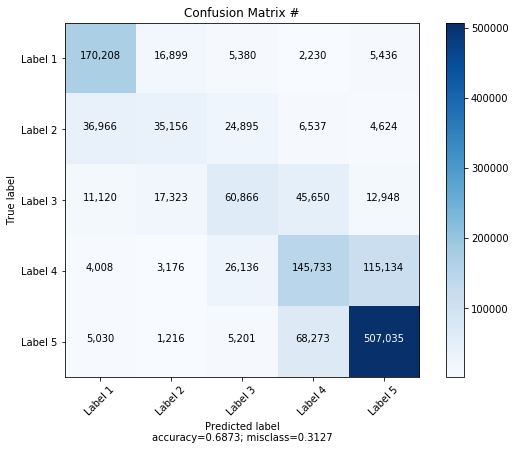

In [103]:
plot_confusion_matrix(cm=cm_v1, normalize=False, target_names = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5'], title = "Confusion Matrix #")

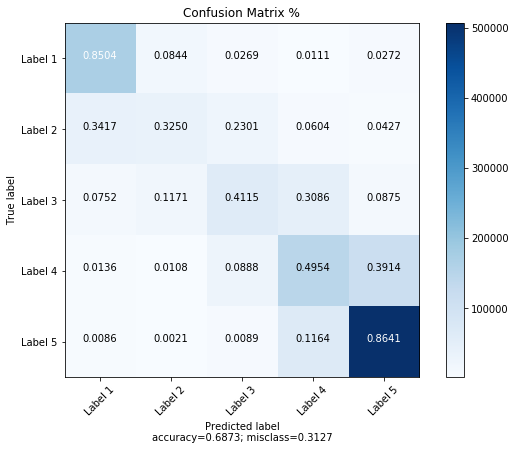

In [102]:
plot_confusion_matrix(cm=cm_v1, normalize=True, target_names = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5'], title = "Confusion Matrix %")

The Confusion Matrix provides following information (I need to format confusion matrix better above):
* Label 1 were correctly predicted @ 85.04%, incorrectly predicted as Label 2 @ 08.44% and so on.
* Label 2 were correctly predicted @ 32.50%, incorrectly predicted as Label 1 @ 34.17% and so on.
* Label 3 were correctly predicted @ 41.15%, incorrectly predicted as Label 4 @ 30.86% and so on.
* Label 4 were correctly predicted @ 49.54%, incorrectly predicted as Label 5 @ 39.14% and so on.
* Label 5 were correctly predicted @ 86.41%, incorrectly predicted as Label 4 @ 11.64% and so on.

Notes:  Both label 1 and label 5 had high prediction rate where as label 2, label 3 and label 4 were not as high.

### I hope you have enjoyed this tutorial. If you have any questions or comments, please provide them via Issues feature on GitHub